# Understanding The Dataset

In [34]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Explore the dataset
print(data.head())         # Display the first few rows
print(data.info())         # Check column types and non-null counts
print(data.describe())     # Summary statistics
print(data.isnull().sum()) # Check for missing values
print(data[data["Class"] == 1])

   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Exploratory Data Analysis

Class
0    284315
1       492
Name: count, dtype: int64


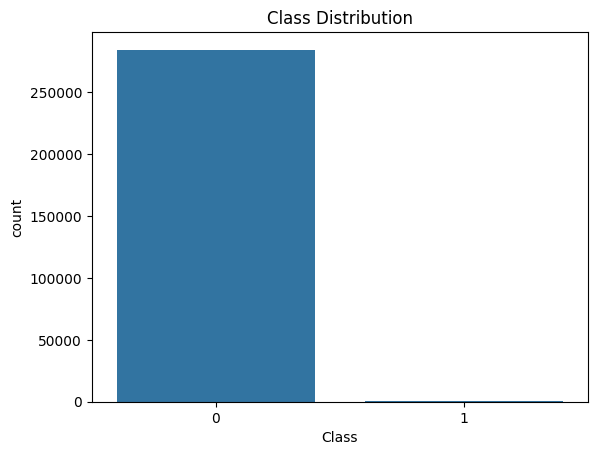

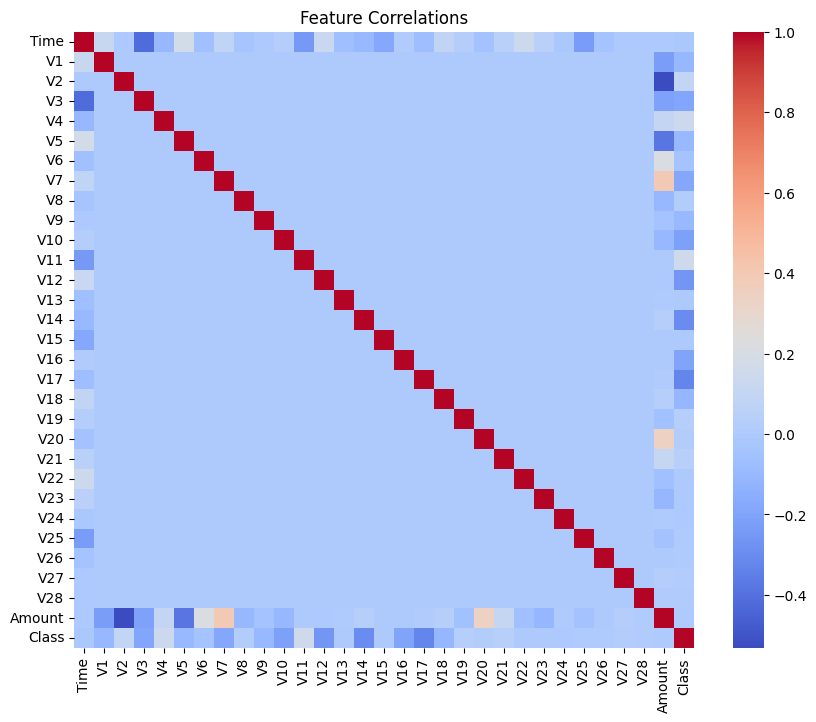

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(data['Class'].value_counts())

# Plot class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlations')
plt.show()


# Data Preprocessing

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Training a Logistic Regression Model:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   35    63]]


# Random Forest Classifier Model

- Since features V2, V4, and V11 have a stronger correlation with the Class variable: Lets Use a subset of the data, with only V2,V4,V11 and Class as features And use a Random Forest Classifier model.

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Load the preprocessed dataset
df = pd.read_csv('creditcard.csv')

# Select the key features based on observations
key_features = ['V2', 'V4', 'V11', 'Class']

# Subset the dataset with key features
df_subset = df[key_features]

# Separate features (X) and target variable (y)
X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# Split the data into train and test sets (stratify ensures class balance in splits)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features (important for algorithms sensitive to magnitudes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the Area Under the Precision-Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print(f"\nArea Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")


Confusion Matrix:
[[85287     8]
 [   72    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.51      0.66       148

    accuracy                           1.00     85443
   macro avg       0.95      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443


Area Under the Precision-Recall Curve (AUPRC): 0.6529


#  Addressing Class Imbalance
The model underperforms on the minority class (fraudulent transactions) due to the extreme class imbalance (0.172% fraud).
- So we use SMOTE for Oversampling to balance the dataset.

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train_resampled))


Class distribution after SMOTE: [199020 199020]


- Split the oversampled dataset into training and testing sets again.

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled dataset
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # For probability-based metrics

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Area Under the Precision-Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auprc = auc(recall, precision)
print(f"\nArea Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")


Confusion Matrix:
[[84546   749]
 [   43   105]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.12      0.71      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.85      0.60     85443
weighted avg       1.00      0.99      0.99     85443


Area Under the Precision-Recall Curve (AUPRC): 0.5380


In [42]:
import pandas as pd
import numpy as np

# Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Display the sorted feature importance
print("\nFeature Importances:")
for idx in sorted_indices:
    print(f"Feature {idx}: {feature_importances[idx]:.4f}")



Feature Importances:
Feature 1: 0.4027
Feature 2: 0.3458
Feature 0: 0.2515


# Hyperparameter Tuning for Random Forest Model

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print(f"\nBest Parameters: {grid_search.best_params_}")

# Train model with best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the test set with the tuned model
y_pred_tuned = best_rf_model.predict(X_test_scaled)
y_prob_tuned = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate tuned model
print("\nConfusion Matrix (Tuned):")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))

# Area Under Precision-Recall Curve (Tuned)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_prob_tuned)
auprc_tuned = auc(recall_tuned, precision_tuned)
print(f"\nArea Under the Precision-Recall Curve (AUPRC - Tuned): {auprc_tuned:.4f}")



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Confusion Matrix (Tuned):
[[84544   751]
 [   43   105]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.12      0.71      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.85      0.60     85443
weighted avg       1.00      0.99      0.99     85443


Area Under the Precision-Recall Curve (AUPRC - Tuned): 0.5629


# Adjust Decision Threshold

- The current decision threshold for classifying a transaction as fraudulent is likely 0.5.
- Lowering the threshold might improve recall further while increasing precision slightly. This is especially useful in fraud detection, where capturing fraudulent cases is critical.

In [44]:
# Step 1: Predict probabilities using the tuned model
y_prob_tuned = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Step 2: Set a custom threshold (e.g., 0.3) and make predictions
custom_threshold = 0.3
y_pred_custom = (y_prob_tuned >= custom_threshold).astype(int)

# Step 3: Evaluate the model with the custom threshold
print("\nConfusion Matrix (Custom Threshold):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom))

# Step 4: Precision-Recall Curve and AUPRC
precision_custom, recall_custom, _ = precision_recall_curve(y_test, y_prob_tuned)
auprc_custom = auc(recall_custom, precision_custom)
print(f"\nArea Under Precision-Recall Curve (Custom Threshold): {auprc_custom:.4f}")



Confusion Matrix (Custom Threshold):
[[83699  1596]
 [   40   108]]

Classification Report (Custom Threshold):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.73      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.86      0.55     85443
weighted avg       1.00      0.98      0.99     85443


Area Under Precision-Recall Curve (Custom Threshold): 0.5629


# Combining SMOTE oversampling with Tomek links to clean noisy samples and retrain the model.

In [45]:
from imblearn.combine import SMOTETomek

# Step 1: Apply SMOTE with Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

# Step 2: Check the new class distribution
print("Class distribution after SMOTE with Tomek Links:", np.bincount(y_train_resampled))

# Step 3: Retrain the model with the new resampled data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict and evaluate on the test set
y_pred_tomek = best_rf_model.predict(X_test_scaled)
y_prob_tomek = best_rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix (SMOTE with Tomek Links):")
print(confusion_matrix(y_test, y_pred_tomek))

print("\nClassification Report (SMOTE with Tomek Links):")
print(classification_report(y_test, y_pred_tomek))

# Precision-Recall Curve and AUPRC
precision_tomek, recall_tomek, _ = precision_recall_curve(y_test, y_prob_tomek)
auprc_tomek = auc(recall_tomek, precision_tomek)
print(f"\nArea Under Precision-Recall Curve (SMOTE with Tomek Links): {auprc_tomek:.4f}")


Class distribution after SMOTE with Tomek Links: [198962 198962]

Confusion Matrix (SMOTE with Tomek Links):
[[84535   760]
 [   43   105]]

Classification Report (SMOTE with Tomek Links):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.12      0.71      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.85      0.60     85443
weighted avg       1.00      0.99      0.99     85443


Area Under Precision-Recall Curve (SMOTE with Tomek Links): 0.5523


# Training an XGBoost Model

In [46]:
from xgboost import XGBClassifier

# Step 1: Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Step 2: Train the model on the SMOTE-Tomek resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict and evaluate on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Precision-Recall Curve and AUPRC
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
auprc_xgb = auc(recall_xgb, precision_xgb)
print(f"\nArea Under Precision-Recall Curve (XGBoost): {auprc_xgb:.4f}")


C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:40:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix (XGBoost):
[[83305  1990]
 [   37   111]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.05      0.75      0.10       148

    accuracy                           0.98     85443
   macro avg       0.53      0.86      0.54     85443
weighted avg       1.00      0.98      0.99     85443


Area Under Precision-Recall Curve (XGBoost): 0.6286


# Lower the decision threshold for XGBoost to balance precision and recall for Class 1

- Moving threshold from 0.5 to 0.3

In [47]:
# Step 1: Set a custom threshold for XGBoost
custom_threshold = 0.3
y_pred_xgb_custom = (y_prob_xgb >= custom_threshold).astype(int)

# Step 2: Evaluate the model with the custom threshold
print("\nConfusion Matrix (XGBoost Custom Threshold):")
print(confusion_matrix(y_test, y_pred_xgb_custom))

print("\nClassification Report (XGBoost Custom Threshold):")
print(classification_report(y_test, y_pred_xgb_custom))

# Precision-Recall Curve and AUPRC
precision_xgb_custom, recall_xgb_custom, _ = precision_recall_curve(y_test, y_prob_xgb)
auprc_xgb_custom = auc(recall_xgb_custom, precision_xgb_custom)
print(f"\nArea Under Precision-Recall Curve (XGBoost Custom Threshold): {auprc_xgb_custom:.4f}")



Confusion Matrix (XGBoost Custom Threshold):
[[81526  3769]
 [   33   115]]

Classification Report (XGBoost Custom Threshold):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.78      0.06       148

    accuracy                           0.96     85443
   macro avg       0.51      0.87      0.52     85443
weighted avg       1.00      0.96      0.98     85443


Area Under Precision-Recall Curve (XGBoost Custom Threshold): 0.6286


# Hyperparameter Tuning for XGBoost

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Step 1: Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [3, 5, 7],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate (shrinkage step size)
    'subsample': [0.8, 1.0],                # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],         # Fraction of features used for training each tree
    'scale_pos_weight': [1, 10, 50, 100],   # Balances the positive and negative classes
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',    # Focus on F1-score for imbalanced data
    cv=3,            # 3-fold cross-validation
    n_jobs=-1,       # Use all available CPU cores
    verbose=1        # Output progress messages
)

# Step 4: Fit the grid search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 5: Retrieve the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("\nBest Parameters:", best_params)

# Step 6: Evaluate the tuned model on the test set
y_pred_tuned = best_xgb_model.predict(X_test_scaled)
y_prob_tuned = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Confusion Matrix
print("\nConfusion Matrix (Tuned):")
print(confusion_matrix(y_test, y_pred_tuned))

# Classification Report
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))

# Precision-Recall Curve and AUPRC
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_prob_tuned)
auprc_tuned = auc(recall_tuned, precision_tuned)
print(f"\nArea Under Precision-Recall Curve (Tuned): {auprc_tuned:.4f}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.p


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}

Confusion Matrix (Tuned):
[[83901  1394]
 [   44   104]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.70      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.84      0.56     85443
weighted avg       1.00      0.98      0.99     85443


Area Under Precision-Recall Curve (Tuned): 0.6113


# Feature Engineering
- It has the potential to address the root cause of poor precision by enhancing feature separability.

Ranking Features by Importance:
  Feature  Importance
0      V0    0.620123
1      V1    0.282526
2      V2    0.097351


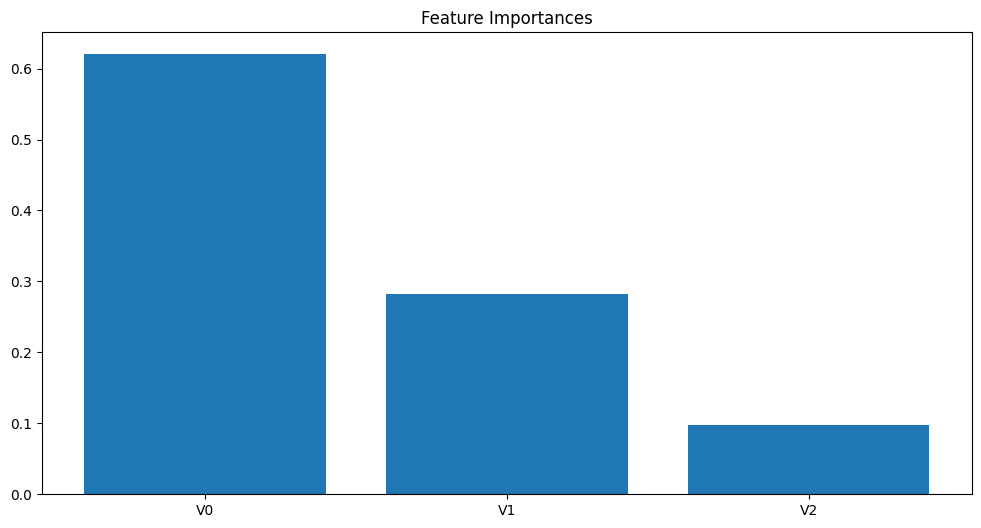

In [49]:
# Analyzing Feature importance from the tuned XGBoost model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_xgb_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': [f"V{i}" for i in range(len(feature_importances))],
    'Importance': feature_importances[sorted_indices]
})

# Display top features
print("Ranking Features by Importance:")
print(feature_importance_df.head())

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importances")
plt.show()


In [50]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Select top 3 important features (ensure the indices are correct)
top_features_indices = sorted_indices[:3]  # Use indices of the top 3 features from feature importances

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit on the training data (top 3 features only)
X_train_interactions = poly.fit_transform(X_train_scaled[:, top_features_indices])

# Apply the same transformation to the test data (top 3 features only)
X_test_interactions = poly.transform(X_test_scaled[:, top_features_indices])

# Combine interaction terms with the original features for both training and test datasets
X_train_new = np.hstack((X_train_scaled, X_train_interactions))
X_test_new = np.hstack((X_test_scaled, X_test_interactions))

# Print shapes to validate
print(f"New Training Dataset Shape: {X_train_new.shape}")
print(f"New Test Dataset Shape: {X_test_new.shape}")


New Training Dataset Shape: (199364, 9)
New Test Dataset Shape: (85443, 9)


In [51]:
assert X_train_new.shape[1] == X_test_new.shape[1], "Feature dimensions between train and test do not match!"

In [62]:
# Log-transform 'Amount' and 'Time' features
X_train_scaled[:, -2] = np.log1p(X_train_scaled[:, -2])  # Assuming 'Amount' is second-to-last column
X_test_scaled[:, -2] = np.log1p(X_test_scaled[:, -2])

X_train_scaled[:, -1] = np.log1p(X_train_scaled[:, -1])  # Assuming 'Time' is the last column
X_test_scaled[:, -1] = np.log1p(X_test_scaled[:, -1])

print("Applied log transformation to 'Amount' and 'Time' features.")



Applied log transformation to 'Amount' and 'Time' features.


C:\Users\Naman Dubey\AppData\Local\Temp\ipykernel_14936\2975819732.py:2: RuntimeWarning: invalid value encountered in log1p
  X_train_scaled[:, -2] = np.log1p(X_train_scaled[:, -2])  # Assuming 'Amount' is second-to-last column
C:\Users\Naman Dubey\AppData\Local\Temp\ipykernel_14936\2975819732.py:3: RuntimeWarning: invalid value encountered in log1p
  X_test_scaled[:, -2] = np.log1p(X_test_scaled[:, -2])
C:\Users\Naman Dubey\AppData\Local\Temp\ipykernel_14936\2975819732.py:5: RuntimeWarning: invalid value encountered in log1p
  X_train_scaled[:, -1] = np.log1p(X_train_scaled[:, -1])  # Assuming 'Time' is the last column
C:\Users\Naman Dubey\AppData\Local\Temp\ipykernel_14936\2975819732.py:6: RuntimeWarning: invalid value encountered in log1p
  X_test_scaled[:, -1] = np.log1p(X_test_scaled[:, -1])


In [63]:
# Compute Mean and Standard Deviation of the Top Features
X_train_mean = np.mean(X_train_scaled[:, sorted_indices[:3]], axis=1).reshape(-1, 1)
X_test_mean = np.mean(X_test_scaled[:, sorted_indices[:3]], axis=1).reshape(-1, 1)

X_train_std = np.std(X_train_scaled[:, sorted_indices[:3]], axis=1).reshape(-1, 1)
X_test_std = np.std(X_test_scaled[:, sorted_indices[:3]], axis=1).reshape(-1, 1)

# Combine Statistical Features with the Original Scaled Datasets
X_train_new = np.hstack((X_train_scaled, X_train_mean, X_train_std))
X_test_new = np.hstack((X_test_scaled, X_test_mean, X_test_std))

print(f"Dataset Shape After Adding Statistical Features: {X_train_new.shape}")
print(f"Test Dataset Shape After Adding Statistical Features: {X_test_new.shape}")


Dataset Shape After Adding Statistical Features: (199364, 5)
Test Dataset Shape After Adding Statistical Features: (85443, 5)


In [64]:
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")


Shape of X_train_new: (199364, 5)
Shape of y_train_resampled: (397924,)


In [65]:
# Example: Filter indices applied to X_train_new
valid_indices = np.arange(X_train_new.shape[0])  # Adjust this based on actual filtering logic
X_train_new_filtered = X_train_new[valid_indices]
y_train_resampled_filtered = y_train_resampled[valid_indices]

print(f"Filtered X_train_new Shape: {X_train_new_filtered.shape}")
print(f"Filtered y_train_resampled Shape: {y_train_resampled_filtered.shape}")

# Ensure consistency
assert X_train_new_filtered.shape[0] == y_train_resampled_filtered.shape[0], "Mismatch resolved!"


Filtered X_train_new Shape: (199364, 5)
Filtered y_train_resampled Shape: (199364,)


In [66]:
# Check data types and dimensions
import numpy as np

print(f"Features Type: {type(X_train_new_filtered)}, Shape: {X_train_new_filtered.shape}")
print(f"Labels Type: {type(y_train_resampled_filtered)}, Shape: {y_train_resampled_filtered.shape}")

assert len(X_train_new_filtered.shape) == 2, "Features should be a 2D array!"
assert len(y_train_resampled_filtered.shape) == 1, "Labels should be a 1D array!"


Features Type: <class 'numpy.ndarray'>, Shape: (199364, 5)
Labels Type: <class 'pandas.core.series.Series'>, Shape: (199364,)


In [67]:
# Convert labels to NumPy array
y_train_resampled_filtered = y_train_resampled_filtered.values  # For pandas Series
print(f"Updated Labels Type: {type(y_train_resampled_filtered)}, Shape: {y_train_resampled_filtered.shape}")


Updated Labels Type: <class 'numpy.ndarray'>, Shape: (199364,)


In [68]:
# Confirm shapes and types
print(f"Features Type: {type(X_train_new_filtered)}, Shape: {X_train_new_filtered.shape}")
print(f"Labels Type: {type(y_train_resampled_filtered)}, Shape: {y_train_resampled_filtered.shape}")

assert len(X_train_new_filtered.shape) == 2, "Features should be a 2D array!"
assert len(y_train_resampled_filtered.shape) == 1, "Labels should be a 1D array!"


Features Type: <class 'numpy.ndarray'>, Shape: (199364, 5)
Labels Type: <class 'numpy.ndarray'>, Shape: (199364,)


In [94]:
print(f"Training Feature Shape: {X_train_new_filtered.shape}")
print(f"Test Feature Shape: {X_test_new.shape}")

Training Feature Shape: (199364, 5)
Test Feature Shape: (85443, 5)


In [93]:
# Ensure feature shapes match
assert X_train_new_filtered.shape[1] == X_test_new.shape[1], "Feature mismatch between training and test datasets!"

# Re-training the XGBoost Model

C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:24:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[85292     3]
 [  148     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443


Area Under Precision-Recall Curve (AUPRC): 0.0047


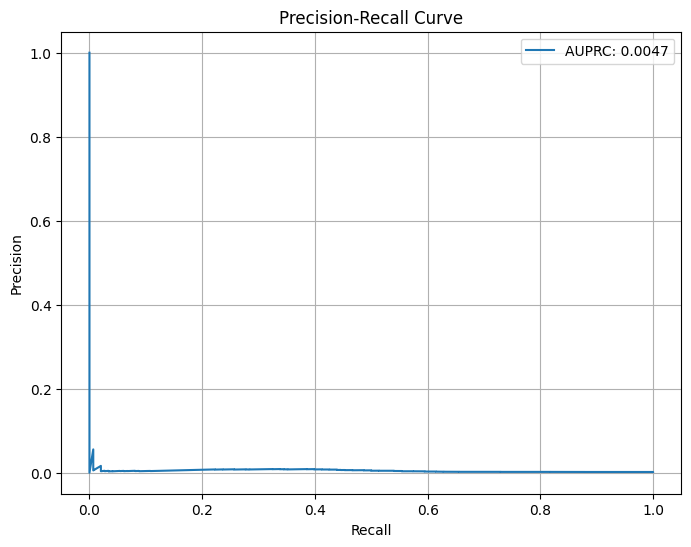

In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Define the XGBoost model with tuned parameters (replace with your best parameters)
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=1.0,
    scale_pos_weight=1,
    random_state=42,
    use_label_encoder=False,  # Suppress warnings
    eval_metric='logloss'     # Metric for imbalanced classification
)

# Train the model on the updated dataset
xgb_model.fit(X_train_new_filtered, y_train_resampled_filtered)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_new)
y_prob = xgb_model.predict_proba(X_test_new)[:, 1]

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auprc = auc(recall, precision)
print(f"\nArea Under Precision-Recall Curve (AUPRC): {auprc:.4f}")

# Optional: Plot Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC: {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


- Handling Class Imbalance

Class 1 is only 0.172% of the dataset

In [88]:
scale_pos_weight = len(y_train_resampled_filtered[y_train_resampled_filtered == 0]) / len(y_train_resampled_filtered[y_train_resampled_filtered == 1])
print(f"Scale Pos Weight: {scale_pos_weight}")


Scale Pos Weight: 494.9303482587065


In [89]:
feature_importances = xgb_model.feature_importances_
for idx, importance in enumerate(feature_importances):
    print(f"Feature {idx}: {importance:.4f}")


Feature 0: 0.1941
Feature 1: 0.2044
Feature 2: 0.2014
Feature 3: 0.2023
Feature 4: 0.1978


In [102]:
# Calculate the scale_pos_weight dynamically
scale_pos_weight = len(y_train_resampled_filtered[y_train_resampled_filtered == 0]) / len(y_train_resampled_filtered[y_train_resampled_filtered == 1])

# Initialize XGBoost with the correct parameters
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=1.0,
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model with the updated dataset (5 features)
xgb_model.fit(X_train_new, y_train_resampled_filtered)

# Predict on the test set
y_pred = xgb_model.predict(X_test_new)
y_prob = xgb_model.predict_proba(X_test_new)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auprc = auc(recall, precision)
print(f"\nArea Under Precision-Recall Curve (AUPRC): {auprc:.4f}")


C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[84314   981]
 [  145     3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.00      0.02      0.01       148

    accuracy                           0.99     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      0.99      0.99     85443


Area Under Precision-Recall Curve (AUPRC): 0.0025


In [103]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

# Initialize a basic XGBoost model
xgb_selector = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit XGBoost on the training data
xgb_selector.fit(X_train_new, y_train_resampled_filtered)

# Perform feature selection
selector = SelectFromModel(xgb_selector, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train_new)
X_test_selected = selector.transform(X_test_new)

print(f"Selected Training Feature Shape: {X_train_selected.shape}")
print(f"Selected Test Feature Shape: {X_test_selected.shape}")


C:\Users\Naman Dubey\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Selected Training Feature Shape: (199364, 3)
Selected Test Feature Shape: (85443, 3)


[LightGBM] [Info] Number of positive: 198962, number of negative: 198962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 397924, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Confusion Matrix:
[[84380   915]
 [  129    19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.02      0.13      0.04       148

    accuracy                           0.99     85443
   macro avg       0.51      0.56      0.51     85443
weighted avg       1.00      0.99      0.99     85443


Area Under Precision-Recall Curve (AUPRC): 0.0756


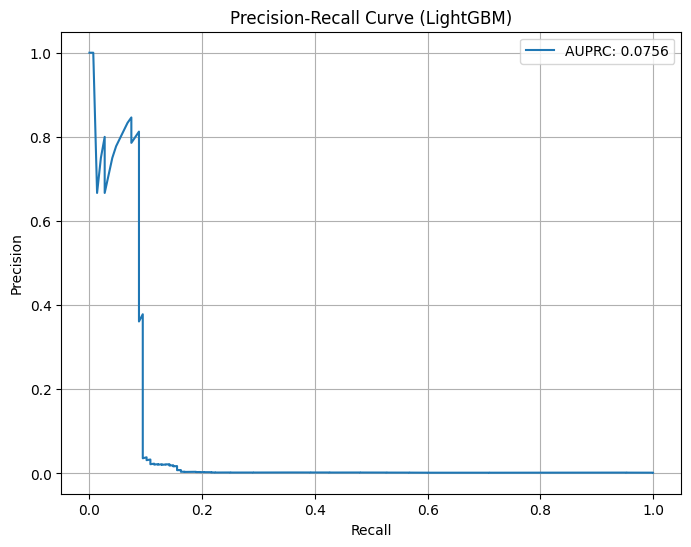

In [104]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Initialize LightGBM with class weighting
lgb_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7
)

# Train the model
lgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = lgb_model.predict(X_test_selected)
y_prob = lgb_model.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auprc = auc(recall, precision)
print(f"\nArea Under Precision-Recall Curve (AUPRC): {auprc:.4f}")

# Plot the Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC: {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend()
plt.grid()
plt.show()
